# SI 370: Dimension Reduction

## Objectives:
- ...

Note: some slides from Eytan Adar and Kevyn Collins-Thompson


![](resources/pca/Slide17.png)

![](resources/pca/Slide24.png)

![](resources/pca/Slide25.png)

![](resources/pca/Slide26.png)

![](resources/pca/Slide27.png)

![](resources/pca/Slide28.png)

![](resources/pca/Slide29.png)

![](resources/pca/Slide30.png)

![](resources/pca/Slide31.png)

![](resources/pca/Slide32.png)

![](resources/pca/Slide33.png)

![](resources/pca/Slide34.png)

![](resources/pca/Slide35.png)

![](resources/pca/Slide36.png)

![](resources/pca/Slide37.png)

![](resources/pca/Slide38.png)

![](resources/pca/Slide39.png)

![](resources/pca/Slide40.png)

![](resources/pca/Slide41.png)

In [2]:
%matplotlib inline

Automatically created module for IPython interactive environment


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide


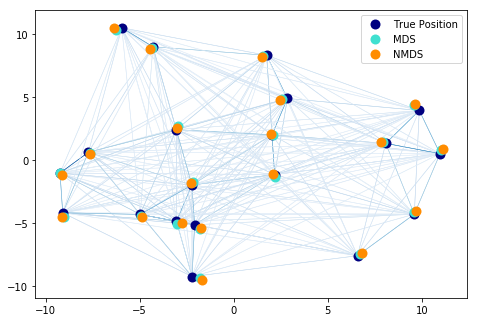

In [3]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# License: BSD

print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)

plt.show()

![](resources/pca/Slide42.png)

![](resources/pca/Slide43.png)

![](resources/pca/Slide44.png)

![](resources/pca/Slide45.png)

![](resources/pca/Slide46.png)

![](resources/pca/Slide47.png)

![](resources/pca/Slide48.png)

![](resources/pca/Slide49.png)

![](resources/pca/Slide50.png)

![](resources/pca/Slide51.png)

![](resources/pca/Slide52.png)

![](resources/pca/Slide53.png)

![](resources/pca/Slide54.png)

![](resources/pca/Slide55.png)

![](resources/pca/Slide56.png)

![](resources/pca/Slide57.png)

![](resources/pca/Slide58.png)

![](resources/pca/Slide59.png)

![](resources/pca/Slide60.png)

![](resources/pca/Slide61.png)

![](resources/pca/Slide62.png)

![](resources/pca/Slide63.png)

![](resources/pca/Slide64.png)

![](resources/pca/Slide65.png)

![](resources/pca/Slide66.png)

![](resources/pca/Slide67.png)

In [4]:
# loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# loading the data

data = pd.read_csv("data/music.csv")
#data = data.drop(["Channel", "Region"], axis=1)
data.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,RandB_Soul,Rock
0,Chris,4,10,4,3,3,1,10,4,6,5,8
1,Xinchun,5,10,6,2,3,1,5,6,6,3,5
2,Johan,3,3,4,3,7,10,2,6,9,8,7
3,Julie,3,3,4,5,6,6,6,4,5,5,6
4,Hana,3,2,6,5,2,6,2,1,9,8,6


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


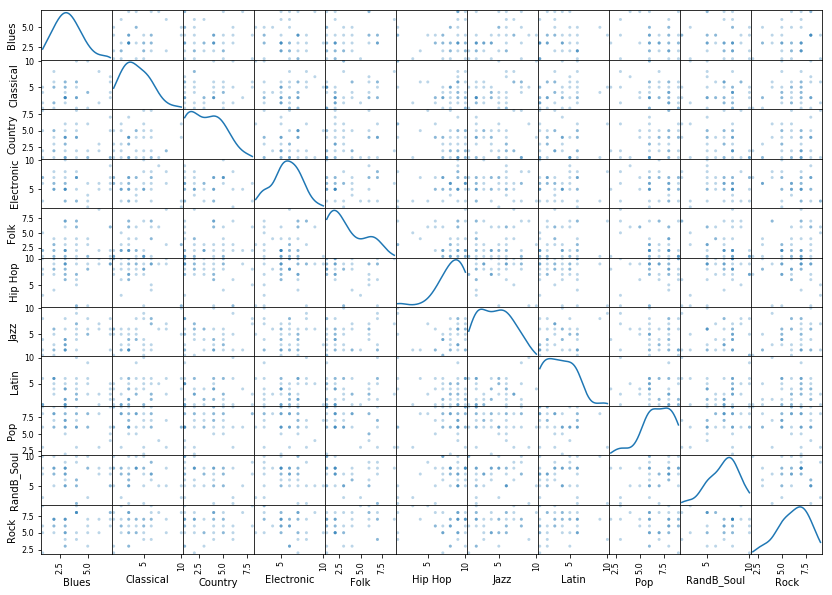

In [6]:
# producing a scatter matrix for each pair of features in the data

pd.scatter_matrix(data, alpha = 0.3, figsize = (14,10), diagonal='kde');
plt.show()

In [7]:
data.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,RandB_Soul,Rock
0,Chris,4,10,4,3,3,1,10,4,6,5,8
1,Xinchun,5,10,6,2,3,1,5,6,6,3,5
2,Johan,3,3,4,3,7,10,2,6,9,8,7
3,Julie,3,3,4,5,6,6,6,4,5,5,6
4,Hana,3,2,6,5,2,6,2,1,9,8,6


In [13]:
data = data.drop('Name',axis=1)

KeyError: "['Name'] not found in axis"

In [14]:
# scaling the data before PCA

from sklearn.preprocessing import scale

data = pd.DataFrame(scale(data), columns=['Blues', 'Classical', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Latin','Pop','RandB_Soul','Rock'])


In [15]:
data.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,RandB_Soul,Rock
0,0.260897,2.572442,0.303259,-1.525132,-0.194871,-2.656474,2.279025,0.111111,-0.379349,-0.871770,1.106223
1,0.855162,2.572442,1.297947,-2.093591,-0.194871,-2.656474,0.145691,1.022222,-0.379349,-1.851018,-0.684111
2,-0.333368,-0.542709,0.303259,-1.525132,1.580620,0.987537,-1.134309,1.022222,1.287079,0.597103,0.509445
3,-0.333368,-0.542709,0.303259,-0.388215,1.136747,-0.632024,0.572358,0.111111,-0.934825,-0.871770,-0.087333
4,-0.333368,-0.987731,1.297947,-0.388215,-0.638744,-0.632024,-1.134309,-1.255556,1.287079,0.597103,-0.087333


In [16]:
# implementing PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

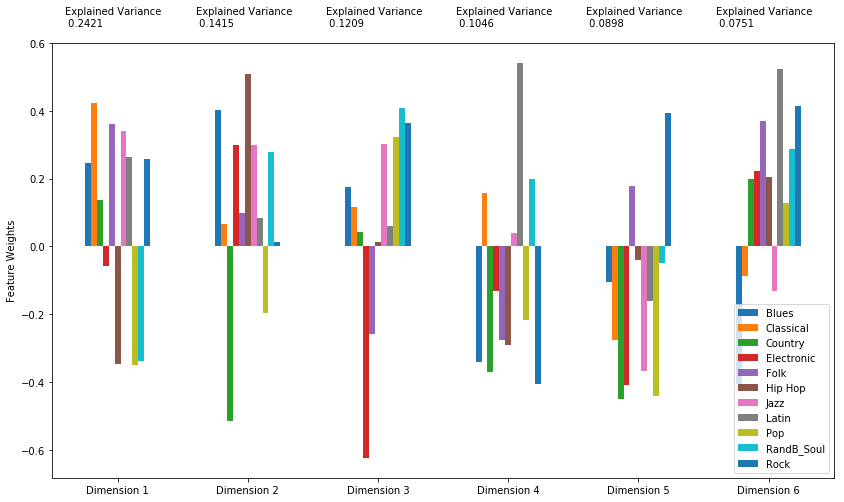

In [17]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

In [18]:
pca_results.cumsum()

,Explained Variance,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,RandB_Soul,Rock
Dimension 1,0.2421,0.2471,0.4225,0.1381,-0.0571,0.3608,-0.3473,0.3409,0.2642,-0.3485,-0.3367,0.2580
Dimension 2,0.3836,0.6488,0.4890,-0.3761,0.2411,0.4606,0.1608,0.6392,0.3475,-0.5450,-0.0571,0.2700
Dimension 3,0.5045,0.8228,0.6068,-0.3324,-0.3825,0.2037,0.1735,0.9402,0.4084,-0.2215,0.3513,0.6350
Dimension 4,0.6091,0.4818,0.7642,-0.7029,-0.5129,-0.0724,-0.1163,0.9791,0.9501,-0.4371,0.5497,0.2306
Dimension 5,0.6989,0.3765,0.4884,-1.1523,-0.9214,0.1044,-0.1574,0.6118,0.7894,-0.8764,0.5016,0.6244
Dimension 6,0.7740,-0.0287,0.4014,-0.9526,-0.6992,0.4741,0.0459,0.4818,1.3118,-0.7479,0.7889,1.0392


![](resources/pca/Slide68.png)

![](resources/pca/Slide69.png)

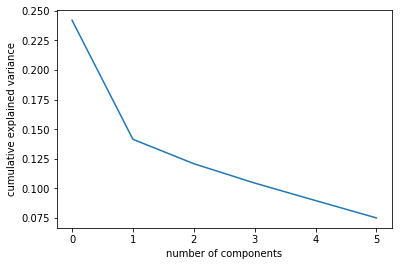

In [19]:
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

![](resources/pca/Slide70.png)

![](resources/pca/Slide71.png)

![](resources/pca/Slide72.png)

![](resources/pca/Slide73.png)

![](resources/pca/Slide74.png)

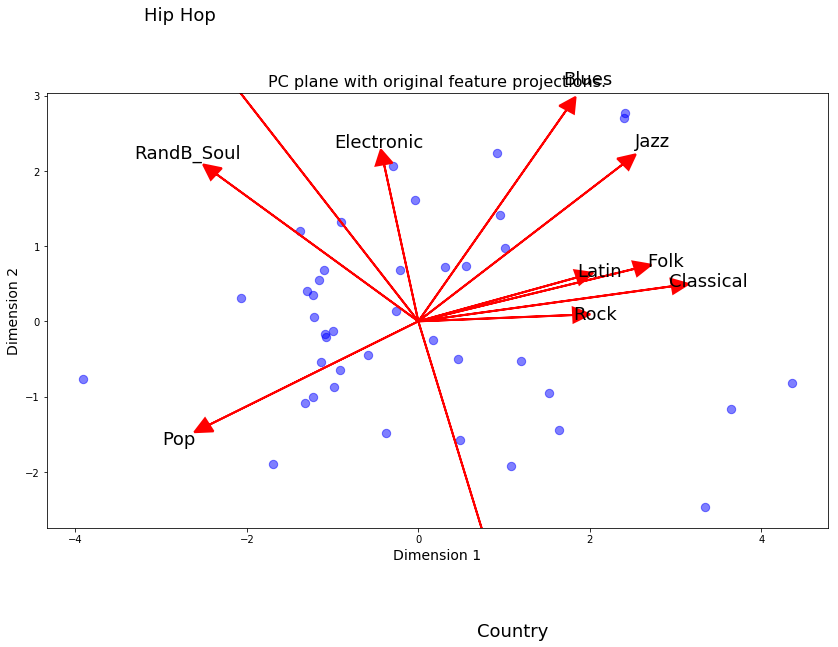

In [23]:

def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

biplot(data, reduced_data, pca)

![](resources/pca/Slide75.png)

![](resources/pca/Slide76.png)

![](resources/pca/Slide77.png)

![](resources/pca/Slide78.png)

![](resources/pca/Slide79.png)